<a href="https://colab.research.google.com/github/AM-Nandeesh/AM-Nandeesh/blob/main/Diabetes_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import io
%matplotlib inline

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Lets use random forest method to predict Diabetes

In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


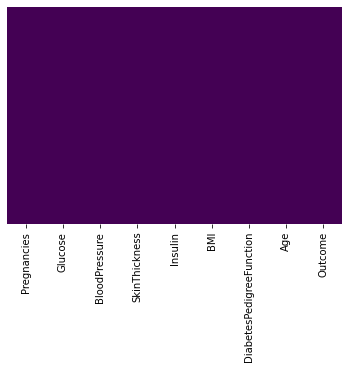

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

no Null Values

In [8]:
df['BloodPressure'].value_counts

<bound method IndexOpsMixin.value_counts of 0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64>

We have 72 '0' values in Blood pressure i.e., null values

In [9]:
for col in df.columns:
    zero_values = len(df[df[col] <= 0])
    print(f'Zero values in {col} = {zero_values}')

Zero values in Pregnancies = 111
Zero values in Glucose = 5
Zero values in BloodPressure = 35
Zero values in SkinThickness = 227
Zero values in Insulin = 374
Zero values in BMI = 11
Zero values in DiabetesPedigreeFunction = 0
Zero values in Age = 0
Zero values in Outcome = 500


In [10]:
zerocols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for col in zerocols:
    median = df[col].median()
    df.loc[df[col]<=0,col] = median

In [11]:
for col in df.columns:
    zero_values = len(df[df[col] <= 0])
    print(f'Zero values in {col} = {zero_values}')

Zero values in Pregnancies = 111
Zero values in Glucose = 0
Zero values in BloodPressure = 0
Zero values in SkinThickness = 0
Zero values in Insulin = 0
Zero values in BMI = 0
Zero values in DiabetesPedigreeFunction = 0
Zero values in Age = 0
Zero values in Outcome = 500


replaced 0 Valued data to median of that column "The best way to deal with missing data"

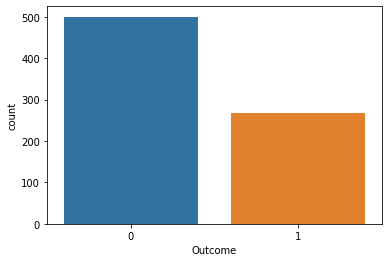

In [12]:
sns.countplot(x='Outcome',data=df,dodge=True)
sns.set(rc={'figure.figsize':(10,5)})

500 people dont have diabetes and 268 have diabetes

<Figure size 576x432 with 0 Axes>

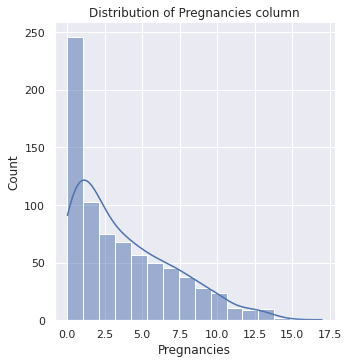

<Figure size 576x432 with 0 Axes>

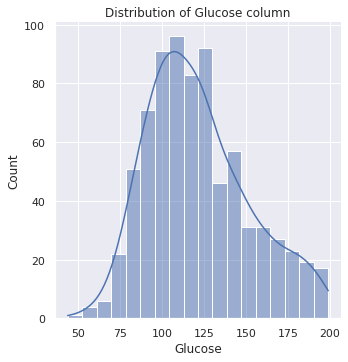

<Figure size 576x432 with 0 Axes>

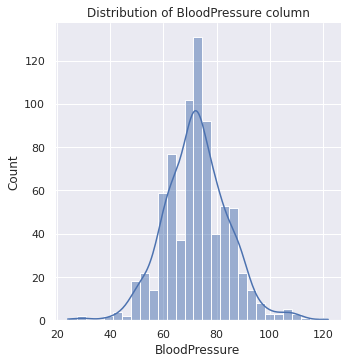

<Figure size 576x432 with 0 Axes>

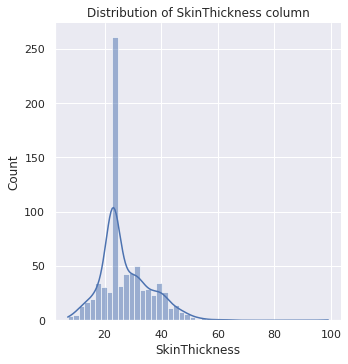

<Figure size 576x432 with 0 Axes>

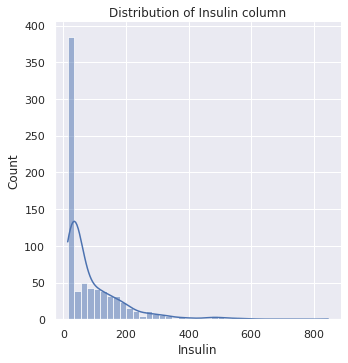

<Figure size 576x432 with 0 Axes>

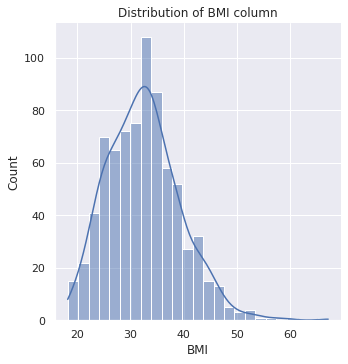

<Figure size 576x432 with 0 Axes>

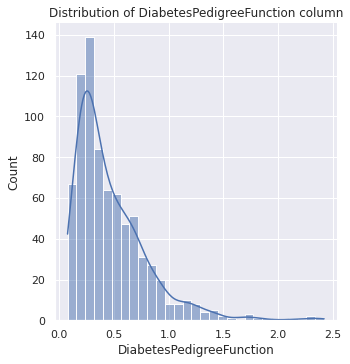

<Figure size 576x432 with 0 Axes>

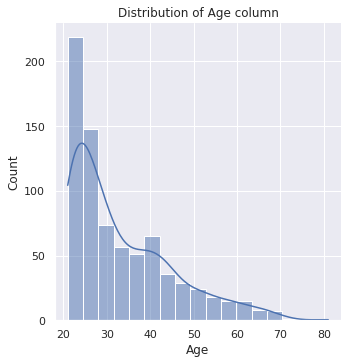

In [13]:
dist_columns = ['Pregnancies', 'Glucose',"BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

for col in dist_columns:
    plt.figure(figsize=(8,6))
    sns.displot(df[col], kde = True)
    plt.title(f"Distribution of {col} column")
    

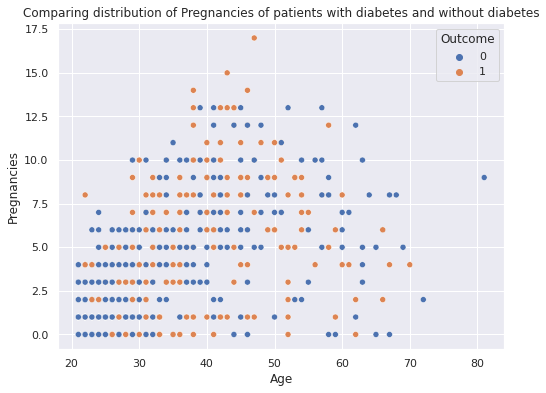

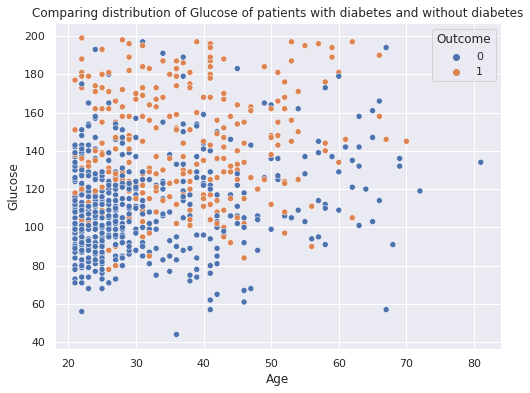

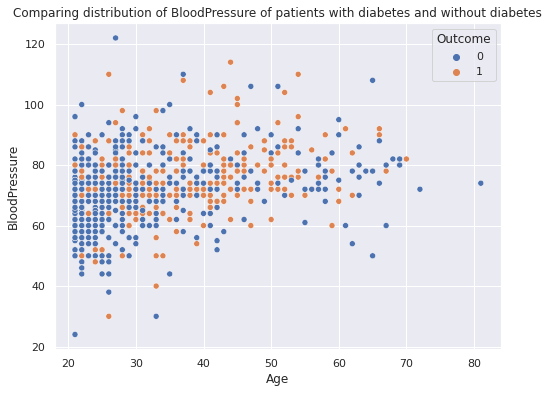

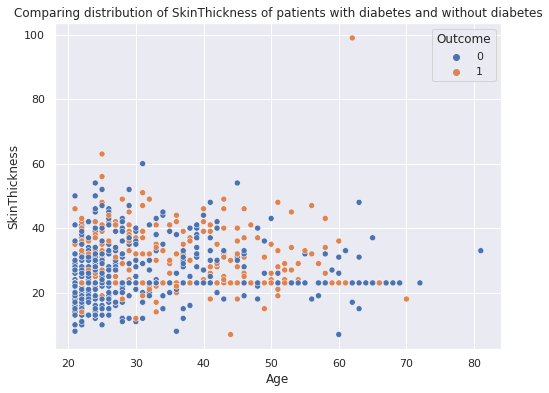

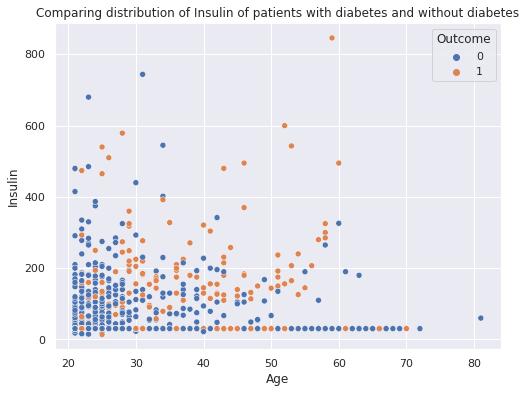

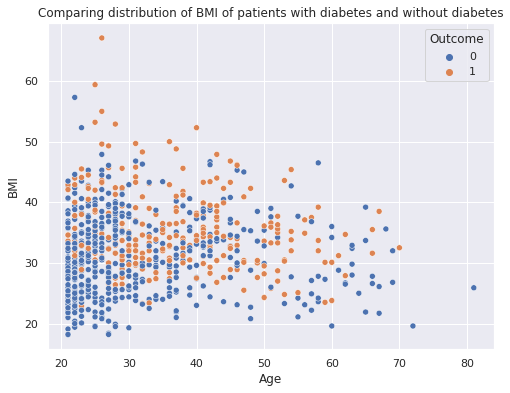

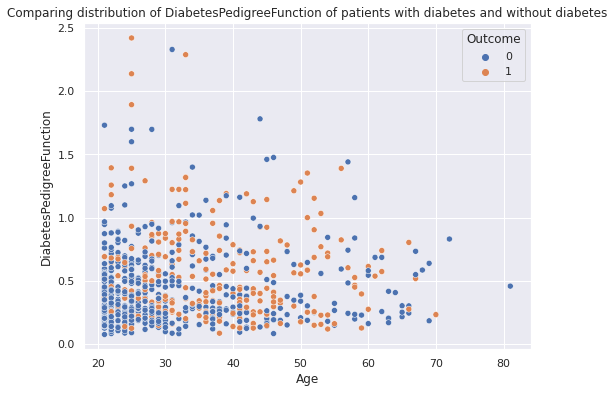

In [14]:
corr_col = ['Pregnancies', 'Glucose',"BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]

for col in corr_col:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="Age",y=col,data=df,hue="Outcome")
    plt.title(f"Comparing distribution of {col} of patients with diabetes and without diabetes")
    plt.show()

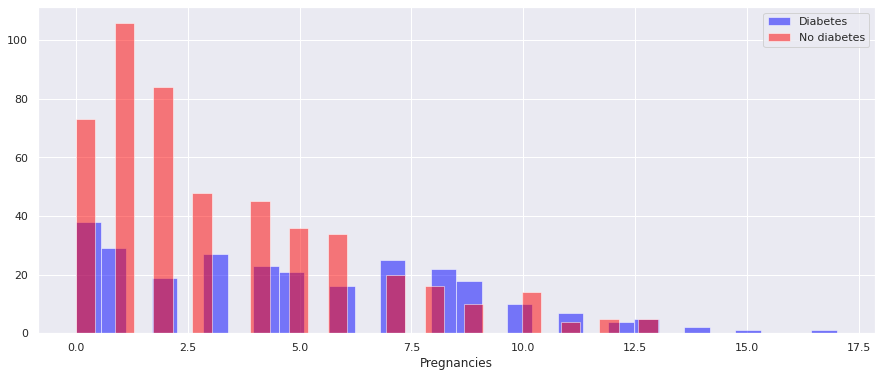

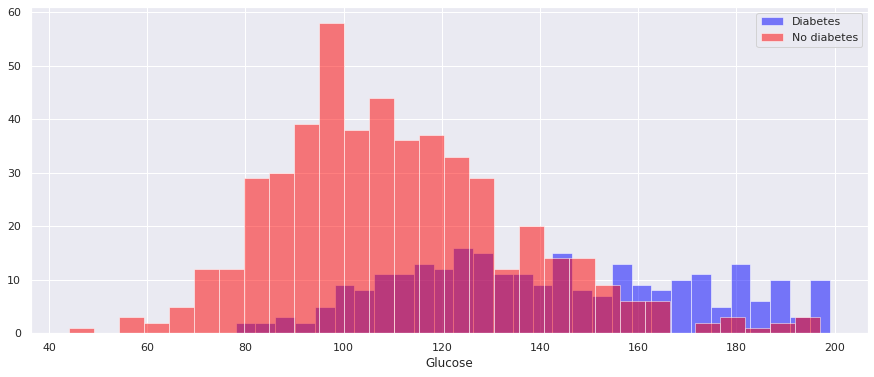

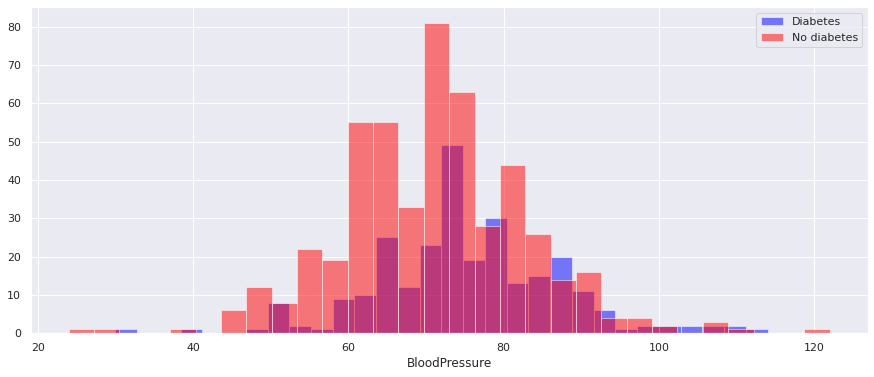

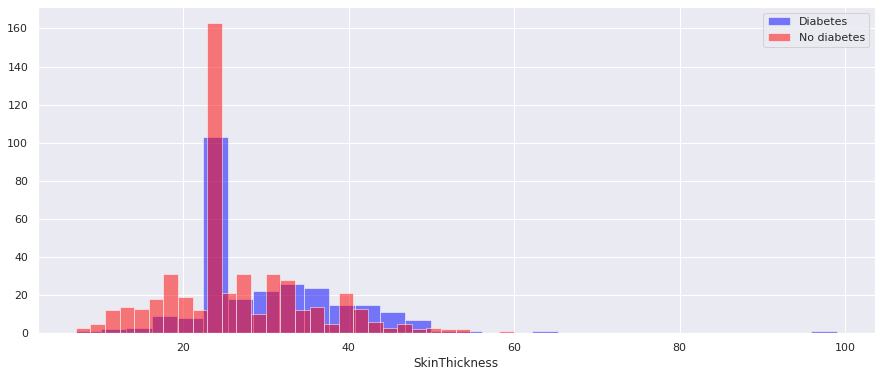

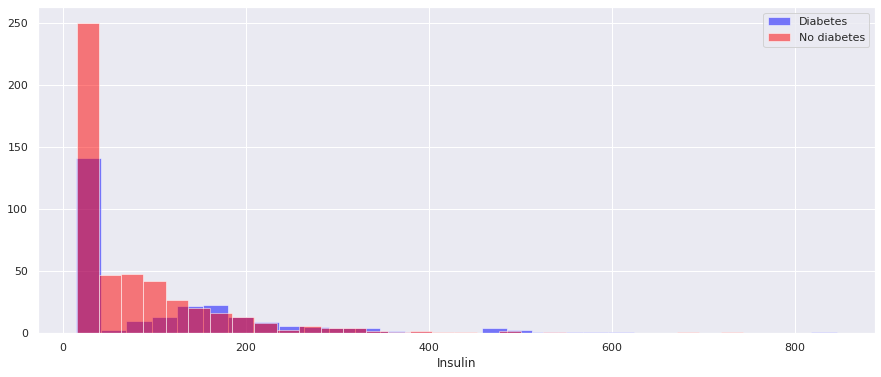

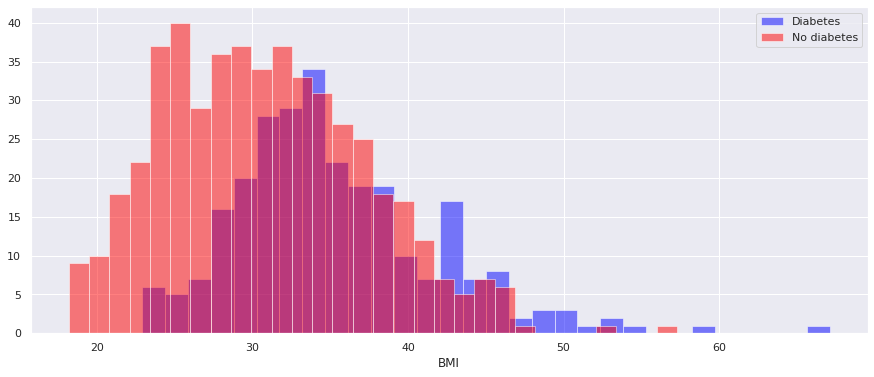

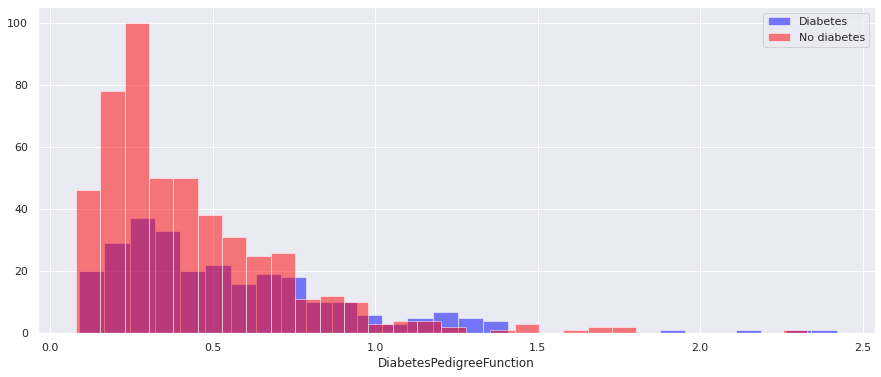

In [15]:
for col in corr_col:
    plt.figure(figsize=(15,6))
    df[df['Outcome']==1][col].hist(alpha=0.5,color='blue',bins=30,label='Diabetes')
    df[df['Outcome']==0][col].hist(alpha=0.5,color='red',bins=30,label='No diabetes')
    plt.legend()
    plt.xlabel(col)

In [37]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


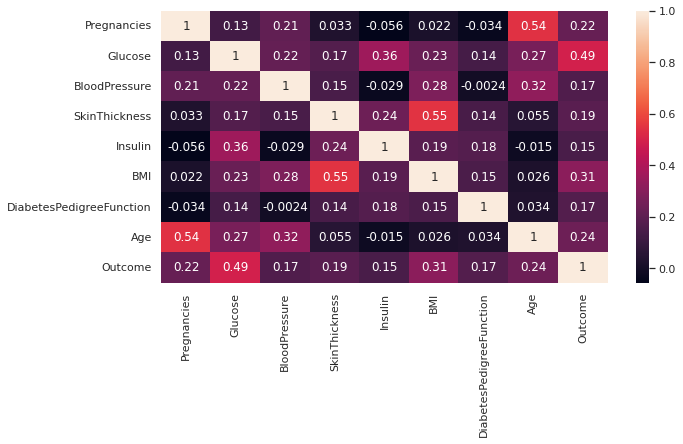

In [38]:
sns.heatmap(df.corr(),annot=True)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier(random_state=7)

In [21]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=7)

In [22]:
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix


In [24]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        97
           1       0.64      0.72      0.68        57

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



[[74 23]
 [16 41]]


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators=200)

In [34]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [35]:
pred = rfc.predict(X_test)

In [36]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        97
           1       0.78      0.70      0.74        57

    accuracy                           0.82       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



[[86 11]
 [17 40]]
